In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


reviews_df= pd.read_csv('Amazon_Reviews.csv')
print(reviews_df)

reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})

y=reviews_df['Label']

reviews_df.drop(columns='Label',axis=1,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,random_state=42,test_size=0.2)


                                                Review        Label
0     Stuning even for the non-gamer: This sound tr...  __label__2 
1     The best soundtrack ever to anything.: I'm re...  __label__2 
2     Amazing!: This soundtrack is my favorite musi...  __label__2 
3     Excellent Soundtrack: I truly like this sound...  __label__2 
4     Remember, Pull Your Jaw Off The Floor After H...  __label__2 
5     an absolute masterpiece: I am quite sure any ...  __label__2 
6     Buyer beware: This is a self-published book, ...  __label__1 
7     Glorious story: I loved Whisper of the wicked...  __label__2 
8     A FIVE STAR BOOK: I just finished reading Whi...  __label__2 
9     Whispers of the Wicked Saints: This was a eas...  __label__2 
10    The Worst!: A complete waste of time. Typogra...  __label__1 
11    Great book: This was a great book,I just coul...  __label__2 
12    Great Read: I thought this book was brilliant...  __label__2 
13    Oh please: I guess you have to be a romanc

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocessing(review):
    final_tokens= ' '
    tokens=tokenizer.tokenize(review)
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemma_tokens = [lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    final_tokens = final_tokens.join(lemma_tokens)
    return final_tokens

In [9]:
#Preprocessing

X_train['Cleaned_text'] = X_train['Review'].apply(preprocessing)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
vectorizer.fit(X_train['Cleaned_text'])
X_trian_TfIdf = vectorizer.transform(X_train['Cleaned_text'])

In [12]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

clf = MultinomialNB()
clf.fit(X_trian_TfIdf.toarray(),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
X_test['Cleaned_text'] = X_test['Review'].apply(preprocessing)
X_test_TfIdf = vectorizer.transform(X_test['Cleaned_text'])
y_pred = clf.predict(X_test_TfIdf.toarray())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.8533333333333333

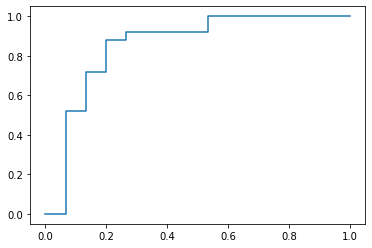

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
y_nb_proba_pred=clf.predict_proba(X_test_TfIdf.toarray())[::,1]
nb_fpr,nb_tpr,nb_thresholds=roc_curve(y_test,y_nb_proba_pred)

plt.plot(nb_fpr,nb_tpr)
roc_auc_score(y_test,y_nb_proba_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8533333333333333

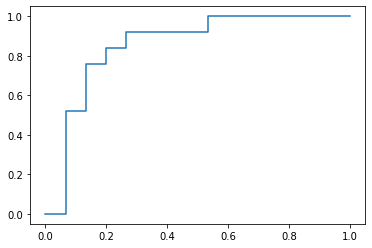

In [27]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_trian_TfIdf.toarray(),y_train)
y_logistic_pred=logit.predict(X_test_TfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_TfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7493333333333334

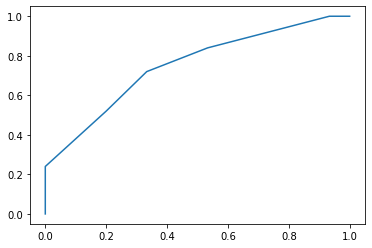

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_trian_TfIdf.toarray(),y_train)
y_rfc_pred = rfc.predict(X_test_TfIdf.toarray())
y_rfc_proba_pred=rfc.predict_proba(X_test_TfIdf.toarray())[::,1]

rfc_fpr,rfc_tpr,rfc_thresholds=roc_curve(y_test,y_rfc_proba_pred)

plt.plot(rfc_fpr,rfc_tpr)

roc_auc_score(y_test,y_rfc_proba_pred)


0.7533333333333333

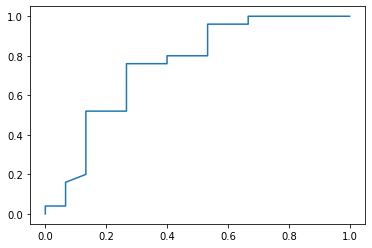

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_trian_TfIdf.toarray(),y_train)
y_gbc_pred = gbc.predict(X_test_TfIdf.toarray())
y_gbc_proba_pred=gbc.predict_proba(X_test_TfIdf.toarray())[::,1]

gbc_fpr,gbc_tpr,gbc_thresholds=roc_curve(y_test,y_gbc_proba_pred)

plt.plot(gbc_fpr,gbc_tpr)

roc_auc_score(y_test,y_gbc_proba_pred)